In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming the file name is 'brown-selected.tab'
df = pd.read_csv('/content/brown-selected.tab', sep='\t')
print(df.head())

      alpha 0     alpha 7    alpha 14    alpha 21    alpha 28    alpha 35  \
0  continuous  continuous  continuous  continuous  continuous  continuous   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2           ?      -0.023       0.057       0.007       0.018      -0.057   
3      -0.031      -0.031       -0.06       0.037      -0.071      -0.018   
4      -0.013           ?       0.067      -0.025       0.017       0.008   

     alpha 42    alpha 49    alpha 56    alpha 63  ...    cold 160  \
0  continuous  continuous  continuous  continuous  ...  continuous   
1         NaN         NaN         NaN         NaN  ...         NaN   
2       0.009      -0.034      -0.016      -0.046  ...       0.117   
3      -0.026      -0.052       0.018       0.052  ...      -0.176   
4      -0.042       0.013       0.111       0.015  ...       0.034   

       diau a      diau b      diau c      diau d      diau e      diau f  \
0  continuous  continuous  continuous  

In [10]:

# Remove the first two rows (metadata and descriptions)
df_cleaned = df.iloc[2:]

# Handle missing values by replacing '?' with NaN and dropping rows with NaN values
df_cleaned.replace('?', float('nan'), inplace=True)
df_cleaned.dropna(inplace=True)

# Encode categorical features
le_function = LabelEncoder()
df_cleaned['function'] = le_function.fit_transform(df_cleaned['function'])
le_gene = LabelEncoder()
df_cleaned['gene'] = le_gene.fit_transform(df_cleaned['gene'])

# Separate features and labels
X = df_cleaned.drop(columns=['function', 'gene'])
y = df_cleaned['function']

# Convert feature data to float
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Classification Report:\n{report}')
print(f'Accuracy: {accuracy}')


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         7

    accuracy                           0.79        14
   macro avg       0.52      0.67      0.58        14
weighted avg       0.66      0.79      0.71        14

Accuracy: 0.7857142857142857


<ipython-input-10-08b33b51fe1d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace('?', float('nan'), inplace=True)
<ipython-input-10-08b33b51fe1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)
<ipython-input-10-08b33b51fe1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['function'] = le_function.fit_transform(df_

<ipython-input-11-028fb4d983f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="viridis")
<ipython-input-11-028fb4d983f4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


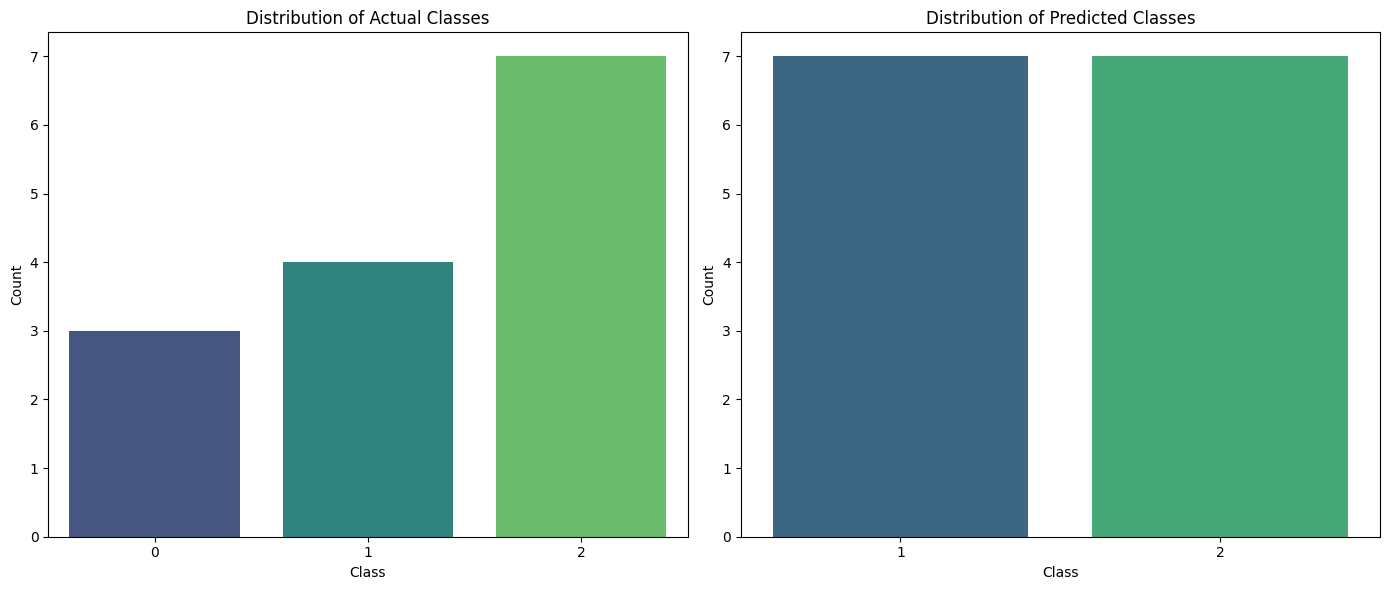

In [11]:
plt.figure(figsize=(14, 6))

# Plot the distribution of actual classes
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, palette="viridis")
plt.title('Distribution of Actual Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot the distribution of predicted classes
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred, palette="viridis")
plt.title('Distribution of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()